In [2]:
import sys
import numpy as np
import cv2 as cv
import pandas as pd


In [19]:
def viewImage(image, name_of_window):
    #cv.imshow(name_of_window, image)
    display(Image.fromarray(image))
    cv.waitKey()
    cv.destroyAllWindows()
    
    
def viewContr(img, contours, name_of_window):
    im = cv.drawContours(img.copy(), contours, -1, (255, 0, 0), 1, cv.LINE_AA, None, 1)
    #cv.imshow(name_of_window, im)
    display(Image.fromarray(im))


In [4]:
img = cv.imread("N:\\LAB_DISK\\vertebra\\Working_with_DICOM\\after_ps_my\\DICOM15.jpg")
img = cv.bitwise_not(img)

# параметры цветового фильтра
hsv_min = np.array((0, 0, 0), np.uint8)
hsv_max = np.array((220, 220, 220), np.uint8)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV )

In [5]:


# меняем цветовую модель с BGR на HSV
thresh = cv.inRange(hsv, hsv_min, hsv_max )
# применяем цветовой фильтр
# ищем контуры и складируем их в переменную contours
contours, hierarchy = cv.findContours(thresh.copy(), cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)

len(contours)

94

In [6]:
areas = []

for i in contours:
    areas.append(cv.contourArea (i))

areas_average = sum(areas) / len(areas)
areas_average_median = np.median(areas)

print(areas_average)
print(areas_average_median)

609.7765957446809
13.5


In [7]:
contours_new = []
for i in contours:
    if cv.contourArea(i) > areas_average :
        contours_new.append(i)
        
print(len(contours_new))
print(len(contours))

4
94


In [24]:
cv.imshow("fdfd", img)
cv.imshow("fdfrgrgd", thresh)

cv.waitKey()
cv.destroyAllWindows()

In [58]:
#cnt = contours_new[2]
#im = cv.drawContours(img.copy(), [cnt], -1, (255, 0, 0), 2, cv.LINE_AA, None, 1)
#cv.imshow('contours', im)

viewContr(img, contours_new, "dkfj")
viewContr(img, contours, "all")

cv.waitKey()
cv.destroyAllWindows()

In [9]:
# лаплас и собель

#sobel_horizontal = cv.Sobel(img.copy(), cv.CV_8U, 1, 0, ksize=5)
#sobel_vertical = cv.Sobel(img.copy(), cv.CV_8U, 0, 1, ksize=5)


#cv.imshow('Sobel horizontal', sobel_horizontal)
#cv.imshow('Sobel vertical', sobel_vertical)


#cv.waitKey()
#cv.destroyAllWindows()

#laplas = cv.Laplacian(thresh.copy(), cv.CV_8U)
#laplas = cv.bitwise_not(laplas)
#cv.imshow('laplas', laplas)
#cv.waitKey()
#cv.destroyAllWindows()

In [10]:
contours_appr = contours_new.copy()
for i in range(len(contours_new)):
    epsilon = 0.001*cv.arcLength(contours_new[i], True)
    approx = cv.approxPolyDP(contours_new[i], epsilon, True)
    contours_appr[i] = approx

print(len(contours_appr[0]))
print(len(contours_new[0]))

74
232


In [22]:
im = cv.drawContours(img.copy(), contours_new[0], -1, (255, 0, 0), 1)
cv.imshow("Contour", im)
im2 = cv.drawContours(img.copy(), contours_appr[0], -1, (255, 0, 0), 1)
cv.imshow("Contour_approx", im2)

cv.waitKey(0)
cv.destroyAllWindows()

In [23]:
im = cv.drawContours(img.copy(), contours_new, -1, (255, 0, 0), 1, cv.LINE_AA, None, 1)
cv.imshow("Contour", im)
im2 = cv.drawContours(img.copy(), contours_appr, -1, (255, 0, 0), 1, cv.LINE_AA, None, 1)
cv.imshow("Contour_approx", im2)

cv.waitKey(0)
cv.destroyAllWindows()

In [15]:
#contours_new
#hierarchy

In [16]:
from PIL import Image
import cv2 
from IPython.display import display


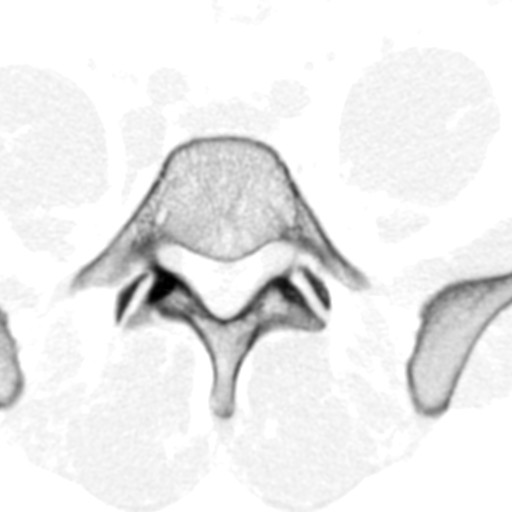

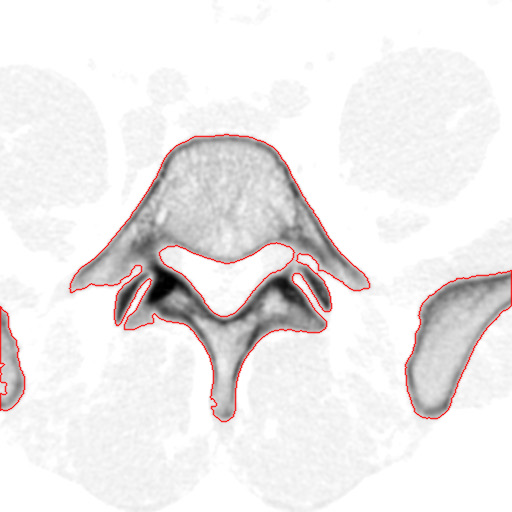

In [18]:
display(Image.fromarray(img))
im = cv.drawContours(img.copy(), contours_new, -1, (255, 0, 0), 1, cv.LINE_AA, None, 1)
display(Image.fromarray(im))